## 知的学習システム 課題3
動径基底関数による回帰問題を理解するために実験を行った。<br>
結果を以下にまとめた。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

関数を定義

In [2]:
def f(x):
    return -100 * x * (x-0.5)**2 * (x-1)

N個の適当なサンプル点を設定し、観測データ {$x_n, t_n$}を生成

In [20]:
#N=100
xs = np.arange(0, 1.01, 0.02)
ts = f(xs) + np.random.normal(loc=0.0, scale=0.2, size=len(xs))

基底関数$\phi_m(x)$を定義

In [4]:
# φ_m(x)
def gaussian_basis_func(s, mu):
    return lambda x:np.exp(-(x-mu)**2 / s)

def gaussian_basis_funcs(s, mus):
    return [gaussian_basis_func(s, mu) for mu in mus]

計画行列$\Phi$を求め、重み$w$を計算<br>
さらに$w$を用いて関数近似を行う

In [30]:
def RUN(xs, ts):
    # Φ
    s = 0.1
    N = len(xs)  # データの点数
    M = 9  # 基底関数の個数
    xsM = np.arange(0, 1.01, 1.0/(M-1))
    bases = gaussian_basis_funcs(s, xsM)

    def phis(x):
        return np.array([basis(x) for basis in bases])

    PHI = np.array(map(phis, xs))
    PHI.resize(N, M)

    # w
    ws = np.dot(np.dot(np.dot(PHI.T,PHI)**-1, PHI.T), ts)

    # 関数近似
    def approximate(xs, ts, m):
        def func(x):
            y = 0.0
            for i, w in enumerate(ws):
                y += w*(x**i)
            return y
        sigma2 = 0.0
        for x, t in zip(xs, ts):
            sigma2 += (f(x)-t)**2
        sigma2 /= len(xs)

        return (func, np.sqrt(sigma2))
    
    plt.clf()
    plt.axis([-0.05, 1.05, -2.0, 2.0])
    plt.title('%d sample%s' % (N, 's' if N > 1 else ''))
    
    x_ = np.arange(-0.05, 1.05, 0.01)
    plt.plot(x_, f(x_), color='green')
    
    function, sigma = approximate(xs, ts, M)
    plt.plot(x_, function(x_)/1000, color='red')
#     print(function(x_))
    
    plt.scatter(xs, ts, color='blue', marker='o')
    plt.show()

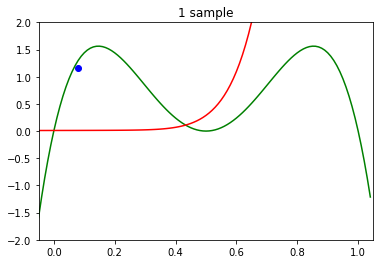

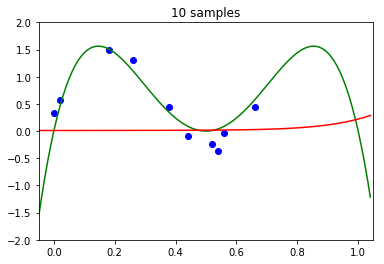

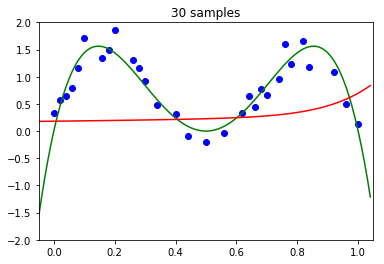

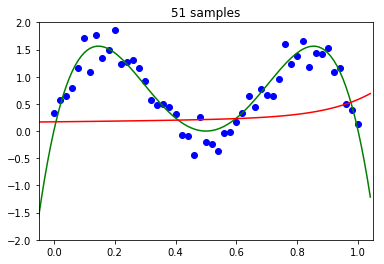

In [31]:
def randidx(n, k):
    r = range(n)
    np.random.shuffle(r)
    return np.sort(r[0:k])

for k in (1, 10, 30, 100):
    indices = randidx(len(xs), k)
    RUN(xs[indices], ts[indices])

In [1]:
who

Interactive namespace is empty.
